## Plotting mrms data

In [2]:
%matplotlib inline
import numpy as np, sys, os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import Nio as nio

/Users/maria/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
filename = "MRMS_PrecipRate_00.00_20160109-130000.grib2"
f = nio.open_file(filename)
print(f)

Nio file:	MRMS_PrecipRate_00.00_20160109-130000.grib2
   global attributes:
   dimensions:
      lat_0 = 3500
      lon_0 = 7000
   variables:
      float PrecipRate_P0_L102_GLL0 [ lat_0, lon_0 ]
         center :	US NOAA Office of Oceanic and Atmospheric Research
         production_status :	Research products
         long_name :	Radar Precipitation Rate
         units :	mm/hr
         _FillValue :	1e+20
         grid_type :	Latitude/longitude
         parameter_discipline_and_category :	Multi-Radar/Multi-Sensor (MRMS) products, Category 6
         parameter_template_discipline_category_number :	[0, 209, 6, 1]
         level_type :	Specific altitude above mean sea level (m)
         level :	0
         forecast_time :	0
         forecast_time_units :	minutes
         initial_time :	01/09/2016 (13:00)
      float lat_0 [ lat_0 ]
         long_name :	latitude
         grid_type :	Latitude/Longitude
         units :	degrees_north
         Dj :	0.01
         Di :	0.009999999
         Lo2 :

In [4]:
lat = f.variables["lat_0"][:]
lon = f.variables["lon_0"][:]
var_name = "PrecipRate_P0_L102_GLL0"
var = f.variables[var_name][:]
print var.min(),var.max()

-3.0 103.8


In [5]:
#---Convert latitude/longitude 1D arrays to 2D.
lon2d, lat2d = np.meshgrid(lon,lat)

var = f.variables["PrecipRate_P0_L102_GLL0"][:,:]


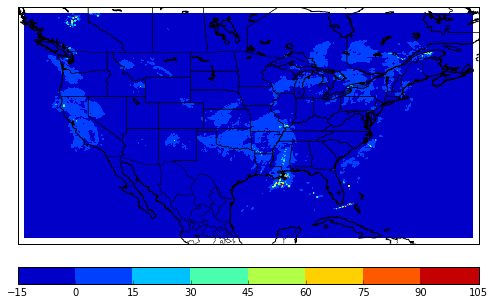

In [6]:
fig = plt.figure(figsize=(8,8))
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

# Define and plot the meridians and parallels
min_lat = np.amin(lat)
max_lat = np.amax(lat)
min_lon = np.amin(lon)
max_lon = np.amax(lon)
    

# Create the basemap object
bm = Basemap(projection="cyl",
             llcrnrlat=min_lat-1,
             urcrnrlat=max_lat+1,
             llcrnrlon=min_lon-1,
             urcrnrlon=max_lon+1,
             resolution='l')

#map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
#              resolution='c',  llcrnrlon=0.,urcrnrlon=360.)

bm.drawcoastlines()
bm.drawstates()
bm.drawcountries()
cf  = bm.contourf(lon2d,lat2d,var)
cb  = bm.colorbar(cf,"bottom", size="7%", pad="10%")